https://chat.openai.com/c/c96f2325-a355-414f-a624-bc6a51d1348e

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

In [10]:
corona_df = pd.read_csv(
    "../data/newly_confirmed_cases_daily.csv", index_col="pref_name"
)
latlong_df = pd.read_csv("../data/pref_lat_lon.csv", index_col="pref_name")

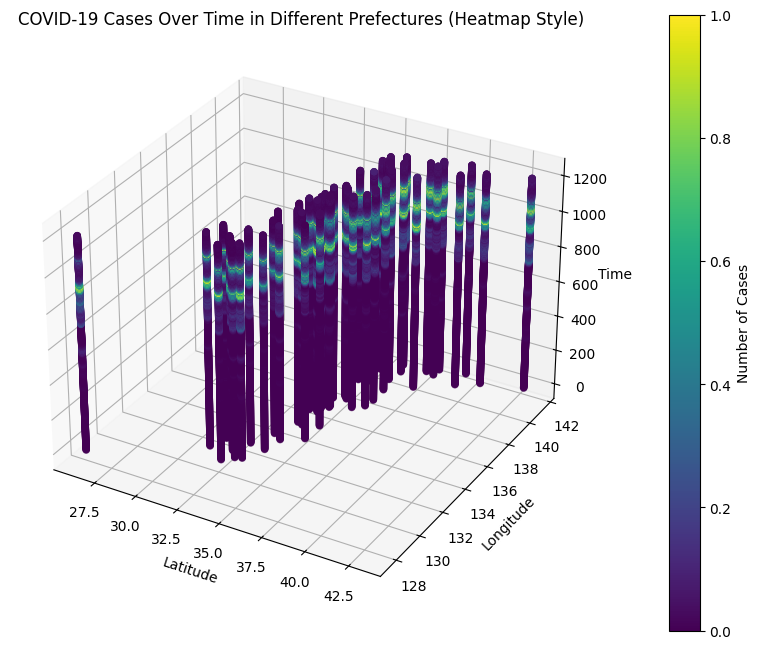

In [17]:
# 3Dプロット
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# データのプロット
for pref_name, row in corona_df.iterrows():
    lat = latlong_df.loc[pref_name, "lat"]
    lon = latlong_df.loc[pref_name, "lon"]
    time_points = pd.to_datetime(row.index, format="%Y-%m-%d")
    cases = row.values.astype(int)

    # 感染ケース数に基づいてカラーマップを設定
    colors = plt.cm.viridis(cases / cases.max())

    # プロット
    ax.scatter(lat, lon, range(len(cases)), c=colors)


# グラフの設定
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Time")
ax.set_title("COVID-19 Cases Over Time in Different Prefectures (Heatmap Style)")

# カラーバーの追加
cbar = plt.colorbar(ax.collections[0], ax=ax, pad=0.1)
cbar.set_label("Number of Cases")

plt.show()